In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score
from pprint import pprint

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')
# df = pd.read_csv("/content/drive/MyDrive/Eli Lilly/data/dataset/train.csv")

In [3]:
df = pd.read_csv("D:/Sashank/Music Data/train.csv")

In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15681 entries, 0 to 15680
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instance_id        15681 non-null  object 
 1   track_name         15681 non-null  object 
 2   popularity         15039 non-null  float64
 3   acousticness       15681 non-null  float64
 4   danceability       15125 non-null  float64
 5   duration_ms        15587 non-null  float64
 6   energy             15587 non-null  float64
 7   instrumentalness   15586 non-null  float64
 8   key                15681 non-null  object 
 9   liveness           15681 non-null  float64
 10  loudness           15645 non-null  float64
 11  voice_gender       14916 non-null  object 
 12  mode               15646 non-null  object 
 13  speechiness        15655 non-null  float64
 14  tempo              15681 non-null  object 
 15  musician_category  14321 non-null  object 
 16  valence            150

In [5]:
#Dropping NaN Rows from data set 
df1 = df.copy(deep=True)

In [6]:
df.isna().any()

instance_id          False
track_name           False
popularity            True
acousticness         False
danceability          True
duration_ms           True
energy                True
instrumentalness      True
key                  False
liveness             False
loudness              True
voice_gender          True
mode                  True
speechiness           True
tempo                False
musician_category     True
valence               True
music_genre          False
dtype: bool

In [7]:
df1.dropna(axis=0,how="any",inplace=True)


In [8]:
df1.isna().any()

instance_id          False
track_name           False
popularity           False
acousticness         False
danceability         False
duration_ms          False
energy               False
instrumentalness     False
key                  False
liveness             False
loudness             False
voice_gender         False
mode                 False
speechiness          False
tempo                False
musician_category    False
valence              False
music_genre          False
dtype: bool

In [9]:
print(df.shape,df1.shape)

(15681, 18) (11756, 18)


In [10]:
df1.replace("?",np.nan, inplace=True)

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11756 entries, 1 to 15680
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instance_id        11756 non-null  object 
 1   track_name         11756 non-null  object 
 2   popularity         11756 non-null  float64
 3   acousticness       11756 non-null  float64
 4   danceability       11756 non-null  float64
 5   duration_ms        11756 non-null  float64
 6   energy             11756 non-null  float64
 7   instrumentalness   11756 non-null  float64
 8   key                11756 non-null  object 
 9   liveness           11756 non-null  float64
 10  loudness           11756 non-null  float64
 11  voice_gender       11756 non-null  object 
 12  mode               10938 non-null  object 
 13  speechiness        11756 non-null  float64
 14  tempo              10653 non-null  object 
 15  musician_category  11756 non-null  object 
 16  valence            117

In [12]:
df1.dropna(axis=0,how="any",inplace=True)


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9919 entries, 2 to 15680
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instance_id        9919 non-null   object 
 1   track_name         9919 non-null   object 
 2   popularity         9919 non-null   float64
 3   acousticness       9919 non-null   float64
 4   danceability       9919 non-null   float64
 5   duration_ms        9919 non-null   float64
 6   energy             9919 non-null   float64
 7   instrumentalness   9919 non-null   float64
 8   key                9919 non-null   object 
 9   liveness           9919 non-null   float64
 10  loudness           9919 non-null   float64
 11  voice_gender       9919 non-null   object 
 12  mode               9919 non-null   object 
 13  speechiness        9919 non-null   float64
 14  tempo              9919 non-null   object 
 15  musician_category  9919 non-null   object 
 16  valence            9919

In [14]:
s = df1["tempo"] 
s = pd.to_numeric(s)

In [15]:
df1["tempo"] = s

In [16]:
df1 = df1.drop(columns=['instance_id','track_name'])

In [17]:
from sklearn.compose import make_column_selector as selector
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

In [18]:
X = df1.iloc[ : , :-1]
X.shape
Y = df1["music_genre"]

In [19]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
target= lb.fit_transform(Y)
Y = pd.DataFrame(target)

In [20]:
y = Y.squeeze()

In [21]:
numerical_columns = numerical_columns_selector(X)
categorical_columns = categorical_columns_selector(X)

In [22]:
categorical_columns = list(categorical_columns)
categorical_columns

['key', 'voice_gender', 'mode', 'musician_category']

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

preprocessing = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(), categorical_columns),
        ("Scale", MinMaxScaler(), numerical_columns)]
)
x = preprocessing.fit_transform(X)
x = pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.018311,0.902400,0.080142,0.887279,0.000000,0.022379,0.882529,0.098362,0.382038,0.590104
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.784686,0.215721,0.120262,0.532503,0.002553,0.109658,0.450206,0.015648,0.420772,0.069094
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.000417,0.903174,0.059567,0.000000,0.000356,0.057374,0.837753,0.028831,0.381709,0.449637
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.082993,0.315132,0.080780,0.818889,0.000000,0.067399,0.863266,0.047696,0.769256,0.515491
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.927117,0.606771,0.060785,0.500645,0.135681,0.087138,0.444469,0.043086,0.447650,0.548416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.963249,0.071337,0.055240,0.497832,0.949496,0.110721,0.404582,0.034693,0.209851,0.037778
9915,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.792196,0.322454,0.000000,0.571707,0.026631,0.216570,0.659023,0.021906,0.482036,0.579883
9916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.807131,0.394829,0.110876,0.644538,0.000481,0.624106,0.486386,0.434696,0.514088,0.565495
9917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.103623,0.579299,0.044343,0.913452,0.000082,0.139350,0.837931,0.037324,0.441822,0.373919


In [24]:
categorical_columns

['key', 'voice_gender', 'mode', 'musician_category']

In [25]:
from sklearn.compose import make_column_transformer, make_column_selector

ohn = OneHotEncoder()
scale = MinMaxScaler()

ohn_ct = make_column_transformer(
    (ohn, categorical_columns),
    remainder = 'passthrough' 
)

df_ohn = ohn_ct.fit_transform(X)
df_ohn = pd.DataFrame(df_ohn)


In [26]:
test = list(ohn_ct.get_feature_names_out())[:-11]

In [27]:
test1 = list(ohn_ct.get_feature_names_out())[-11:]


In [28]:
new_list = [s.replace("onehotencoder__", " ") for s in list(ohn_ct.get_feature_names_out())[:-11]]
pprint(new_list)


[' key_Scale A',
 ' key_Scale A Sharp',
 ' key_Scale B',
 ' key_Scale C',
 ' key_Scale C Sharp',
 ' key_Scale D',
 ' key_Scale D Sharp',
 ' key_Scale E',
 ' key_Scale F',
 ' key_Scale F Sharp',
 ' key_Scale G',
 ' key_Scale G Sharp',
 ' voice_gender_Both',
 ' voice_gender_Female',
 ' voice_gender_Male',
 ' mode_Major',
 ' mode_Minor',
 ' musician_category_Band',
 ' musician_category_Duet',
 ' musician_category_Solo']


In [29]:
new_list1 = [s.replace("remainder__", " ") for s in list(ohn_ct.get_feature_names_out())[-11:]]
pprint(new_list1)

[' popularity',
 ' acousticness',
 ' danceability',
 ' duration_ms',
 ' energy',
 ' instrumentalness',
 ' liveness',
 ' loudness',
 ' speechiness',
 ' tempo',
 ' valence']


In [30]:
cols  = new_list +new_list1
len(cols)

31

In [31]:
df_ohn.columns = cols

In [32]:
df_ohn

,key_Scale A,key_Scale A Sharp,key_Scale B,key_Scale C,key_Scale C Sharp,key_Scale D,key_Scale D Sharp,key_Scale E,key_Scale F,key_Scale F Sharp,...,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.020041,0.967948,273314.723,0.857411,0.000000,0.042030,-4.995,0.119917,105.018,0.635525
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.858769,0.280645,410136.987,0.114732,0.002753,0.134782,-26.922,0.039139,112.183,0.074412
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.000459,0.968723,203145.857,-1.000000,0.000384,0.079220,-7.266,0.052014,104.957,0.484246
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.090830,0.380147,275490.630,0.714246,0.000000,0.089873,-5.972,0.070437,176.647,0.555169
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.014646,0.672051,207299.190,0.048039,0.146346,0.110850,-27.213,0.065935,117.155,0.590628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.054190,0.136130,188388.500,0.042151,1.024128,0.135912,-29.236,0.057739,73.166,0.040686
9915,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.866988,0.387476,-1.000,0.196799,0.028725,0.248399,-16.331,0.045251,123.516,0.624518
9916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.883333,0.459917,378128.464,0.349263,0.000519,0.681492,-25.087,0.448377,129.445,0.609022
9917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.113408,0.644554,151226.592,0.912201,0.000089,0.166336,-7.257,0.060308,116.077,0.402700


In [33]:
df_ohn.columns[-11:]


Index([' popularity', ' acousticness', ' danceability', ' duration_ms',
       ' energy', ' instrumentalness', ' liveness', ' loudness',
       ' speechiness', ' tempo', ' valence'],
      dtype='object')

In [34]:
ohn_num = make_column_transformer(
    (scale, new_list1) ,
    remainder = 'passthrough' 
)

num = ohn_num.fit_transform(df_ohn)
df_final = pd.DataFrame(num)


In [35]:
df_final.columns = cols

In [36]:
df_final.columns

Index([' key_Scale A', ' key_Scale A Sharp', ' key_Scale B', ' key_Scale C',
       ' key_Scale C Sharp', ' key_Scale D', ' key_Scale D Sharp',
       ' key_Scale E', ' key_Scale F', ' key_Scale F Sharp', ' key_Scale G',
       ' key_Scale G Sharp', ' voice_gender_Both', ' voice_gender_Female',
       ' voice_gender_Male', ' mode_Major', ' mode_Minor',
       ' musician_category_Band', ' musician_category_Duet',
       ' musician_category_Solo', ' popularity', ' acousticness',
       ' danceability', ' duration_ms', ' energy', ' instrumentalness',
       ' liveness', ' loudness', ' speechiness', ' tempo', ' valence'],
      dtype='object')

In [37]:
from sklearn.model_selection import  train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(df_final,y,test_size=0.2)

In [38]:
from sklearn.feature_selection import SelectKBest
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

k_range = list(range(1,15))
scores = []
error = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train.values.ravel())
    y_pred = knn.predict(X_test)
    accuracy_score(Y_test, y_pred)
    scores.append(metrics.accuracy_score(Y_test,y_pred))
    error.append(np.mean(y_pred != Y_test))

scores= np.mean(scores)
print(scores)

0.5900777649769584


In [39]:
from sklearn.model_selection import cross_val_score

k_range = list(range(1, 15))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

In [40]:
print(k_scores)

[0.5582855019201388, 0.5209833524447226, 0.5605525044390305, 0.5838671816683132, 0.5885326900047965, 0.5911764145339732, 0.5940759987421423, 0.5972247721721231, 0.5964679929229626, 0.5947063569456931, 0.5921877828988537, 0.5908008042665515, 0.5892894692539571, 0.5860123689334574]


Text(0, 0.5, 'Cross-Validated Accuracy')

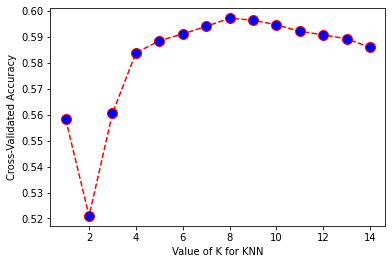

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

Text(0, 0.5, 'Mean Error')

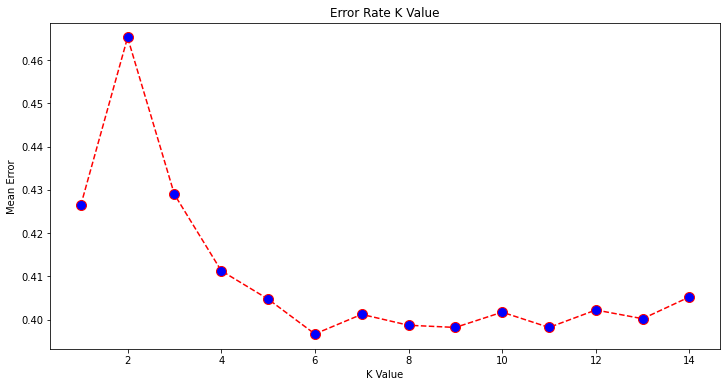

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(k_range, error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [43]:
# Best Value of K
knn = KNeighborsClassifier(n_neighbors=7)
knn_base = knn.fit(X_train,Y_train)
y_pred_knn_base = knn.predict(X_test)
print(accuracy_score(Y_test, y_pred_knn_base))
#print(cross_val_score(knn,X_test,Y_test, cv=10, scoring="accuracy").mean())


0.5987903225806451


## GridSearch


In [44]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 15))
weight_options = ['uniform', 'distance']
algorithms = [ 'ball_tree', 'kd_tree', 'brute']

In [45]:
param_grid = dict(n_neighbors=k_range, weights = weight_options, algorithm = algorithms)
pprint(param_grid)


{'algorithm': ['ball_tree', 'kd_tree', 'brute'],
 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 'weights': ['uniform', 'distance']}


In [46]:
from sklearn.metrics import f1_score, make_scorer
f1 = make_scorer(f1_score , average='macro')

In [47]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy',n_jobs = -1)
grid.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=7), n_jobs=-1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [48]:
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]


,mean_test_score,std_test_score,params
0,0.558286,0.023900,"{'algorithm': 'ball_tree', 'n_neighbors': 1, '..."
1,0.558286,0.023900,"{'algorithm': 'ball_tree', 'n_neighbors': 1, '..."
2,0.520983,0.018220,"{'algorithm': 'ball_tree', 'n_neighbors': 2, '..."
3,0.558286,0.023900,"{'algorithm': 'ball_tree', 'n_neighbors': 2, '..."
4,0.560553,0.016662,"{'algorithm': 'ball_tree', 'n_neighbors': 3, '..."
...,...,...,...
79,0.603148,0.019089,"{'algorithm': 'brute', 'n_neighbors': 12, 'wei..."
80,0.589289,0.021729,"{'algorithm': 'brute', 'n_neighbors': 13, 'wei..."
81,0.603655,0.020804,"{'algorithm': 'brute', 'n_neighbors': 13, 'wei..."
82,0.586012,0.020368,"{'algorithm': 'brute', 'n_neighbors': 14, 'wei..."


In [49]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.6088189796741641
{'algorithm': 'ball_tree', 'n_neighbors': 8, 'weights': 'distance'}
KNeighborsClassifier(algorithm='ball_tree', n_neighbors=8, weights='distance')


## Using the best parameters to make predictions


In [50]:
y_pred_grid_knn = grid.predict(X_test)
accuracy_score(Y_test, y_pred_grid_knn)

0.6174395161290323

In [51]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred_grid_knn))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       506
           1       0.29      0.09      0.14        89
           2       0.15      0.02      0.04        86
           3       0.25      0.06      0.09        54
           4       0.54      0.47      0.50       346
           5       0.53      0.62      0.57       378
           6       0.56      0.73      0.64       525

    accuracy                           0.62      1984
   macro avg       0.45      0.41      0.40      1984
weighted avg       0.59      0.62      0.59      1984



In [55]:
print(metrics.f1_score(Y_test,y_pred_grid_knn,average="weighted"))
f1_score_knn = metrics.f1_score(Y_test,y_pred_grid_knn,average="weighted")

0.592003248588874


In [56]:
print(metrics.roc_auc_score(Y_test,y_score = grid.predict_proba(X_test), multi_class='ovr'))
roc_auc_score_knn = metrics.roc_auc_score(Y_test,y_score = grid.predict_proba(X_test), multi_class='ovr')

0.7762670452334975


# Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegressionCV

logreg = LogisticRegressionCV(cv = 5, random_state = 0,solver='newton-cg',n_jobs = -1).fit(X_train,Y_train)


In [58]:
y_pred_log_test = logreg.predict(X_test)

In [59]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred_log_test))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       506
           1       0.59      0.36      0.45        89
           2       0.52      0.26      0.34        86
           3       0.00      0.00      0.00        54
           4       0.65      0.72      0.68       346
           5       0.72      0.78      0.75       378
           6       0.77      0.86      0.81       525

    accuracy                           0.76      1984
   macro avg       0.59      0.55      0.56      1984
weighted avg       0.73      0.76      0.74      1984



C:\Users\sasha\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sasha\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sasha\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
from sklearn.metrics import f1_score
f1_score_log = metrics.f1_score(Y_test,y_pred_log_test,average='weighted')
print(log_best_f1)


NameError: name 'log_best_f1' is not defined

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score_log = metrics.roc_auc_score(Y_test, y_score=logreg.predict_proba(X_test), multi_class='ovr')
pprint(log_best_roc)

0.9328170457595614


In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_test,y_pred_log_test)

0.6005815087575956

## Classification: Full Trees

In [ ]:
from sklearn.tree import  DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)

In [ ]:
clf_pred = clf.predict(X_test)

In [ ]:
clf_f1 = metrics.f1_score(Y_test,clf_pred,average="weighted")
clf_f1

0.6553617208429575

In [ ]:
roc_clf =  metrics.roc_auc_score(Y_test,y_score = clf.predict_proba(X_test), multi_class='ovr')
roc_clf

0.7287566078427632

## Hyperpapmeter optimization for Decision Tree Classifier

In [ ]:
criterion_space = ['gini', 'entropy']
splitter_space  = ['best', 'random']
depth_space     = pd.np.arange(1, 25, 1)
leaf_space      = pd.np.arange(1, 100, 1)

C:\Users\sasha\AppData\Local\Temp/ipykernel_4764/3873228531.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  depth_space     = pd.np.arange(1, 25, 1)
C:\Users\sasha\AppData\Local\Temp/ipykernel_4764/3873228531.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  leaf_space      = pd.np.arange(1, 100, 1)


In [ ]:
param_grid = {'criterion'        : criterion_space,
              'splitter'         : splitter_space,
              'max_depth'        : depth_space,
              'min_samples_leaf' : leaf_space}


In [ ]:
tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
                                   param_distributions   = param_grid,
                                   cv                    = 3,
                                   n_iter                = 300,
                                   scoring = "accuracy"
                                   )



In [ ]:
tuned_tree_cv.fit(X_train, Y_train)


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=300,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                                        'splitter': ['best', 'random']},
                   scoring='accuracy')

In [ ]:
tuned_tree_cv.best_params_

{'splitter': 'best',
 'min_samples_leaf': 25,
 'max_depth': 12,
 'criterion': 'entropy'}

In [ ]:
y_best_dtc = tuned_tree_cv.predict(X_test)
f1_score_dtc = metrics.f1_score(Y_test,y_best_dtc,average="weighted")
print(f1_score_dtc)


0.7163474217938101


In [ ]:
roc_auc_score_dtc = roc_auc_score(Y_test, y_score =tuned_tree_cv.predict_proba(X_test), multi_class='ovr')
print(roc_auc_score_dtc)


0.8918984936201391


## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()

In [ ]:
rf_classifier.fit(X_train, Y_train)
y_pred_rf = rf_classifier.predict(X_test)


In [ ]:
print(rf_classifier.score(X_test,Y_test))

0.782258064516129


In [ ]:
f1_score_rf = metrics.f1_score(Y_test,y_pred_rf,average="weighted")
print(f1_score_rf)

0.7633967401661936


In [ ]:
roc_auc_score_rf = roc_auc_score(Y_test, y_score= rf_classifier.predict_proba(X_test), multi_class='ovr')
print(roc_auc_score_rf)


0.9363497673085073


In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [ ]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
rf_random = RandomizedSearchCV(estimator = rf_classifier, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, n_jobs = -1)

In [ ]:
rf_rand = rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [ ]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

In [ ]:
y_best_rf = rf_rand.predict(X_test)
print(metrics.f1_score(Y_test,y_best_rf,average="weighted"))
f1_score_best_rf = metrics.f1_score(Y_test,y_best_rf,average="weighted")

0.7623096253499191


In [ ]:
roc_auc_score_rf_best = roc_auc_score(Y_test,y_score=rf_rand.predict_proba(X_test), multi_class='ovr')
print(roc_auc_score_rf_best)

0.9381017025365096


In [ ]:
print(rf_classifier.feature_importances_)
print(f" There are {len(rf_classifier.feature_importances_)} features in total")

[0.18143734 0.10190762 0.10644593 0.03622867 0.0719397  0.08031925
 0.03475912 0.09604017 0.10342796 0.04081073 0.05914562 0.00362803
 0.00331127 0.00373061 0.00389188 0.00453226 0.00372716 0.0023759
 0.00352618 0.00382023 0.00317456 0.00375995 0.00308018 0.00451035
 0.0052806  0.00527597 0.00718143 0.00752192 0.00566168 0.00428163
 0.00526611]
 There are 31 features in total


In [ ]:
og = df1.iloc[:,:-1]


In [ ]:
feature_importances = list(zip(cols, rf_classifier.feature_importances_))
# Then sort the feature importances by most important first
feature_importances_ranked = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
[print('Feature: {:35} Importance: {}'.format(*pair)) for pair in feature_importances_ranked]

Feature:  key_Scale A                        Importance: 0.18143734097305395
Feature:  key_Scale B                        Importance: 0.10644593285552457
Feature:  key_Scale F                        Importance: 0.1034279605155673
Feature:  key_Scale A Sharp                  Importance: 0.10190761665204832
Feature:  key_Scale E                        Importance: 0.09604017099264536
Feature:  key_Scale D                        Importance: 0.08031924624478663
Feature:  key_Scale C Sharp                  Importance: 0.07193970378034617
Feature:  key_Scale G                        Importance: 0.05914562086372769
Feature:  key_Scale F Sharp                  Importance: 0.040810731703104466
Feature:  key_Scale C                        Importance: 0.0362286651705177
Feature:  key_Scale D Sharp                  Importance: 0.03475911920561819
Feature:  loudness                           Importance: 0.007521919076645631
Feature:  liveness                           Importance: 0.00718142929872807

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

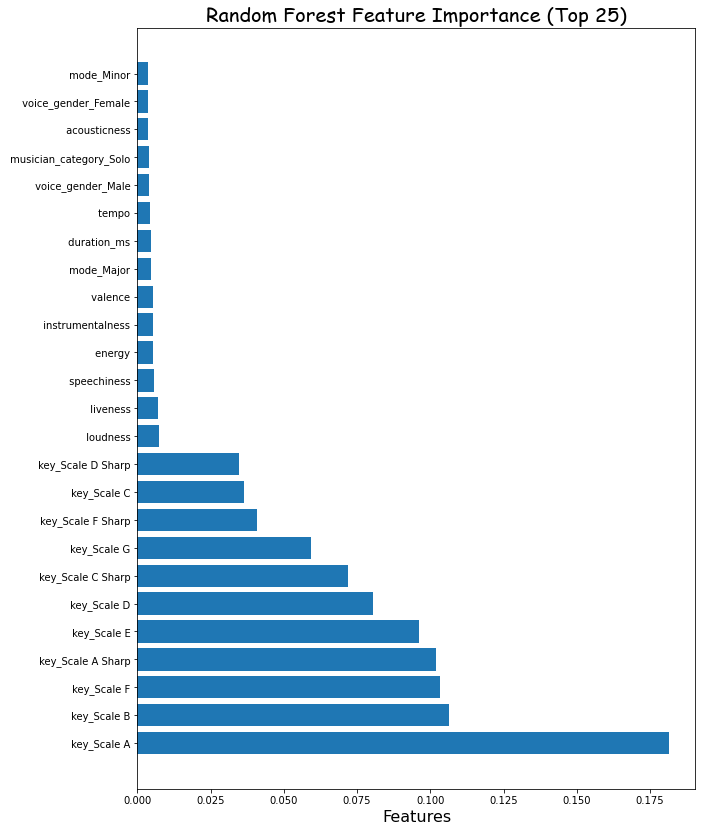

In [ ]:
feature_names_25 = [i[0] for i in feature_importances_ranked[:25]]
y_ticks = np.arange(0, len(feature_names_25))
x_axis = [i[1] for i in feature_importances_ranked[:25]]
plt.figure(figsize = (10, 14))
plt.barh(feature_names_25, x_axis)   #horizontal barplot
plt.title('Random Forest Feature Importance (Top 25)',
          fontdict= {'fontname':'Comic Sans MS','fontsize' : 20})
plt.xlabel('Features',fontdict= {'fontsize' : 16})
plt.show()

## Gradient Boosting Classifier 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier # gbm

gb = GradientBoostingClassifier()
gb = gb.fit(X_test,Y_test)

In [ ]:
y_pred_gb = gb.predict(X_test)

In [ ]:
f1_score_gb = metrics.f1_score(Y_test,y_pred_gb, average='weighted')
print(f1_score_gb)

0.9667942235247596


In [ ]:
roc_auc_score_gb = roc_auc_score(Y_test,y_score=gb.predict_proba(X_test), multi_class='ovr')
print(roc_auc_score_gb)

0.9989201761658971


In [ ]:
print(classification_report(Y_test,y_pred_gb))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       521
           1       0.99      0.96      0.97        90
           2       1.00      0.94      0.97        77
           3       1.00      0.96      0.98        55
           4       0.97      0.97      0.97       393
           5       0.97      0.94      0.95       385
           6       0.93      0.97      0.95       463

    accuracy                           0.97      1984
   macro avg       0.98      0.96      0.97      1984
weighted avg       0.97      0.97      0.97      1984



In [ ]:
feature_importances = list(zip(cols, gb.feature_importances_))
# Then sort the feature importances by most important first
feature_importances_ranked = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
[print('Feature: {:35} Importance: {}'.format(*pair)) for pair in feature_importances_ranked]

Feature:  key_Scale A                        Importance: 0.25444407040074213
Feature:  key_Scale A Sharp                  Importance: 0.2092855115489209
Feature:  key_Scale F                        Importance: 0.14613992347084717
Feature:  key_Scale B                        Importance: 0.12179965176989153
Feature:  key_Scale E                        Importance: 0.09796307343193186
Feature:  key_Scale D                        Importance: 0.04674929773557633
Feature:  key_Scale G                        Importance: 0.04260291885696003
Feature:  key_Scale C Sharp                  Importance: 0.024735980344314432
Feature:  key_Scale F Sharp                  Importance: 0.019156893703836955
Feature:  key_Scale C                        Importance: 0.016080872985961944
Feature:  key_Scale D Sharp                  Importance: 0.011258967916440018
Feature:  loudness                           Importance: 0.0017710333310403373
Feature:  danceability                       Importance: 0.001361150761

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

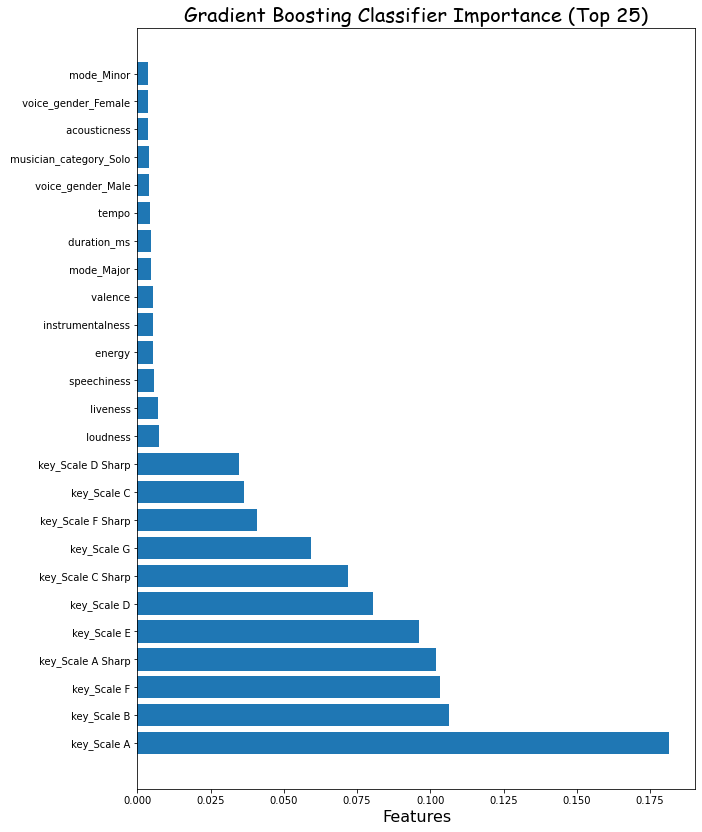

In [ ]:
feature_names_25 = [i[0] for i in feature_importances_ranked[:25]]
y_ticks = np.arange(0, len(feature_names_25))
x_axis = [i[1] for i in feature_importances_ranked[:25]]
plt.figure(figsize = (10, 14))
plt.barh(feature_names_25, x_axis)   #horizontal barplot
plt.title('Gradient Boosting Classifier Importance (Top 25)',
          fontdict= {'fontname':'Comic Sans MS','fontsize' : 20})
plt.xlabel('Features',fontdict= {'fontsize' : 16})
plt.show()

In [ ]:
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

In [ ]:
xg_rand = RandomizedSearchCV(estimator = gb, param_distributions = parameters, n_iter = 100, cv = 3, verbose=2, n_jobs = -1)

In [ ]:
xg_rand.fit(X_train,Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 1, 10,
                                                          100],
                                        'max_depth': [1, 3, 5, 7, 9],
                                        'n_estimators': [5, 50, 250, 500]},
                   verbose=2)

In [ ]:
xg_rand.best_estimator_

GradientBoostingClassifier(n_estimators=250)

In [ ]:
y_pred_gb = xg_rand.predict(X_test)

In [ ]:
f1_score_  metrics.f1_score(Y_test,y_pred_gb, average='weighted'))
metrics.roc_auc_score(Y_test,y_score= xg_rand.predict_proba(X_test),multi_class='ovr')

0.7632596066696038


0.9372892530954541

In [ ]:
from xgboost import XGBClassifier

xg = XGBClassifier()
xg = xg.fit(X_train,Y_train)

C:\Users\sasha\anaconda3\envs\tf\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:35:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
y_pred_xg = xg.predict(X_test)

f1_score_xg = metrics.f1_score(Y_test,y_pred_xg,average="weighted")
print(f1_score_xg)
roc_auc_score_xg = metrics.roc_auc_score(Y_test,y_score=xg.predict_proba(X_test),multi_class='ovr')
print(roc_auc_score_xg)

0.7762283216844295
0.9368821488539086


In [ ]:
print(classification_report(Y_test,y_pred_xg))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       521
           1       0.73      0.53      0.62        90
           2       0.57      0.36      0.44        77
           3       0.00      0.00      0.00        55
           4       0.77      0.78      0.78       393
           5       0.73      0.78      0.76       385
           6       0.76      0.87      0.81       463

    accuracy                           0.79      1984
   macro avg       0.64      0.61      0.62      1984
weighted avg       0.77      0.79      0.78      1984



In [ ]:
model_performance = {
    
    'Model Name'        : ['Logistic Regression',
                           'Classification Trees', 
                           'Random Forest',
                           'Gradient Boosted Models'],
           
    'AUC Score'         : [roc_auc_score_log, 
                           roc_auc_score_dtc, 
                           roc_auc_score_rf_best,
                           roc_auc_score_gb
                            ],
    'F1 Score'          :   [f1_score_log,
                            f1_score_dtc,
                            f1_score_best_rf,
                            f1_score_gb
                            ]
}

In [ ]:
model_performance = pd.DataFrame(model_performance)


In [ ]:
model_performance


,Model Name,AUC Score,F1 Score
0,Logistic Regression,0.932817,0.730723
1,Classification Trees,0.891898,0.716347
2,Random Forest,0.938102,0.762310
3,Gradient Boosted Models,0.998920,0.966794
